<a href="https://colab.research.google.com/github/azkaarahiilaa/Project-Data-Analyst/blob/main/Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install faker

DATA DUMMY


In [ ]:
import pandas as pd
# Load data from the specified Excel file
df = pd.read_excel("/data_dummy_cleaned.xlsx")
display(df)

,Nama Lokasi,Jam Login,Nama,Email,No Telepon,Tahun Lahir,Merk HP,Minat Digital,Tipe Lokasi,Usia
0,Shenzhen,18:30,Christopher Patton,abryan@example.net,+1-677-408-9875x5358,2004,Xiaomi,Social Media,Rural,21
1,Brisbane,09:55,Patrick Torres,laurawilliams@example.com,001-757-287-0976x49070,1990,Realme,Social Media,Rural,35
2,Medan,04:31,Robert Edwards,ywillis@example.net,711-756-6005,1985,Oppo,Digital Banking,Urban,40
3,Miami,12:35,Rachel Johnson,michael99@example.com,001-869-500-0037,1989,Vivo,Digital Banking,Suburban,36
4,St. Louis,12:46,Steven Meyers,lindsayleonard@example.net,001-305-246-3162x51301,1995,Oppo,Online Learning,Urban,30
...,...,...,...,...,...,...,...,...,...,...
195,Kuala Lumpur,11:10,Michelle Perez,jonathan26@example.org,+1-954-580-9351x559,1986,Realme,Digital Banking,Urban,39
196,Ho Chi Minh,23:18,Stephanie Andrews MD,philipwoods@example.org,972-631-3048,1993,Realme,E-commerce,Suburban,32
197,Batam,23:28,Richard Sullivan,gwhite@example.com,924.478.6658x2907,1997,Xiaomi,Online Learning,Rural,28
198,Philadelphia,08:26,Megan Hayes,tinawest@example.org,548-766-0038,1988,Oppo,Online Learning,Suburban,37


In [ ]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

if 'Tahun Lahir' in df.columns:
    if 'Usia' not in df.columns:
        current_year = datetime.now().year
        df["Usia"] = current_year - df["Tahun Lahir"]
        df.loc[(df["Usia"] < 10) | (df["Usia"] > 100), "Usia"] = pd.NA
else:
    print("Kolom 'Tahun Lahir' tidak ditemukan. Tidak dapat menghitung dan mengelompokkan usia.")

bins = [20, 25, 30, 35, 40, 150]
labels = ['20-24', '25-29', '30-34', '35-39', '40 - above']
if 'Usia' in df.columns:
    df['Kelompok Usia'] = pd.cut(df['Usia'], bins=bins, labels=labels, right=False, include_lowest=True)
    display(df.head())
else:
    print("Kolom 'Usia' tidak tersedia untuk pengelompokan.")

,Nama Lokasi,Jam Login,Nama,Email,No Telepon,Tahun Lahir,Merk HP,Minat Digital,Tipe Lokasi,Usia,Kelompok Usia
0,Shenzhen,18:30,Christopher Patton,abryan@example.net,+1-677-408-9875x5358,2004,Xiaomi,Social Media,Rural,21,20-24
1,Brisbane,09:55,Patrick Torres,laurawilliams@example.com,001-757-287-0976x49070,1990,Realme,Social Media,Rural,35,35-39
2,Medan,04:31,Robert Edwards,ywillis@example.net,711-756-6005,1985,Oppo,Digital Banking,Urban,40,40 - above
3,Miami,12:35,Rachel Johnson,michael99@example.com,001-869-500-0037,1989,Vivo,Digital Banking,Suburban,36,35-39
4,St. Louis,12:46,Steven Meyers,lindsayleonard@example.net,001-305-246-3162x51301,1995,Oppo,Online Learning,Urban,30,30-34


RATA-RATA USIA PENGGUNA MINAT DIGITAL




Analisis untuk Minat Digital: Social Media
Rata-rata Usia: 29.37
Interval Kepercayaan 95% untuk Rata-rata Usia: (np.float64(27.962636058463236), np.float64(30.76752267169549))


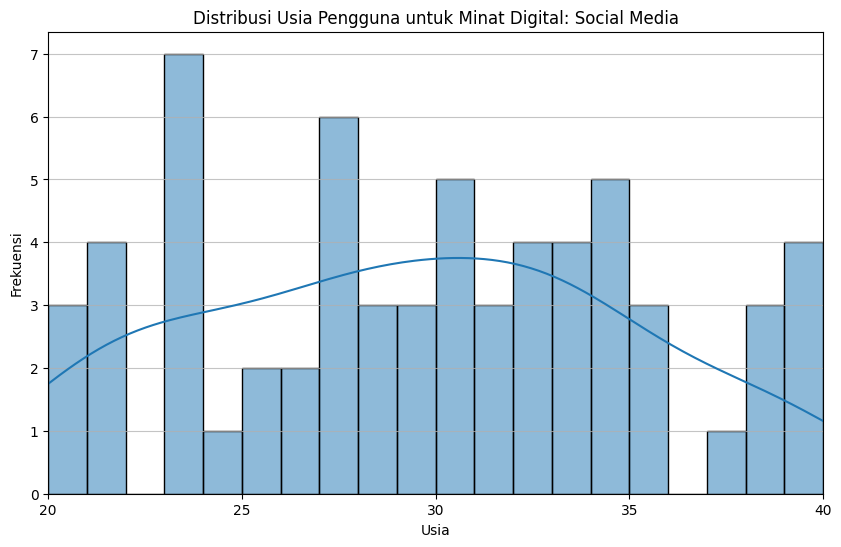


Analisis untuk Minat Digital: Digital Banking
Rata-rata Usia: 30.72
Interval Kepercayaan 95% untuk Rata-rata Usia: (np.float64(28.87788247156811), np.float64(32.568926039070185))


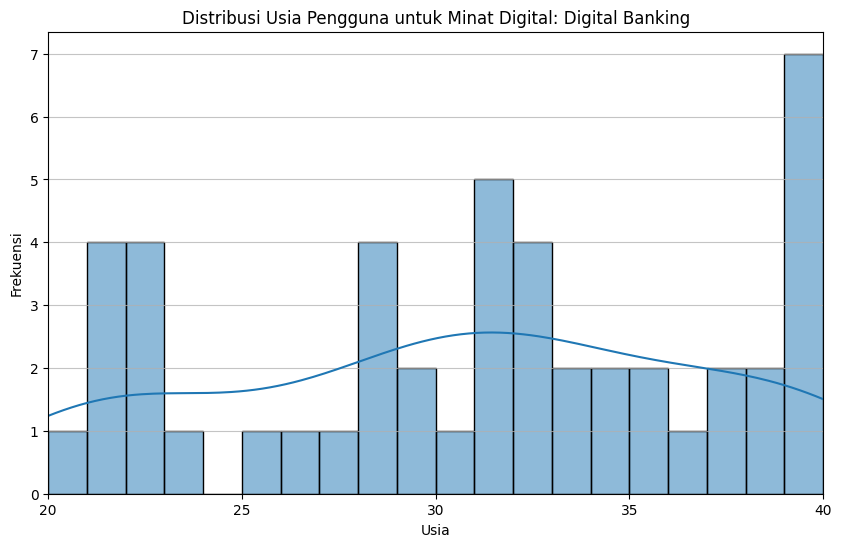


Analisis untuk Minat Digital: Online Learning
Rata-rata Usia: 29.46
Interval Kepercayaan 95% untuk Rata-rata Usia: (np.float64(27.84778394834947), np.float64(31.068882718317195))


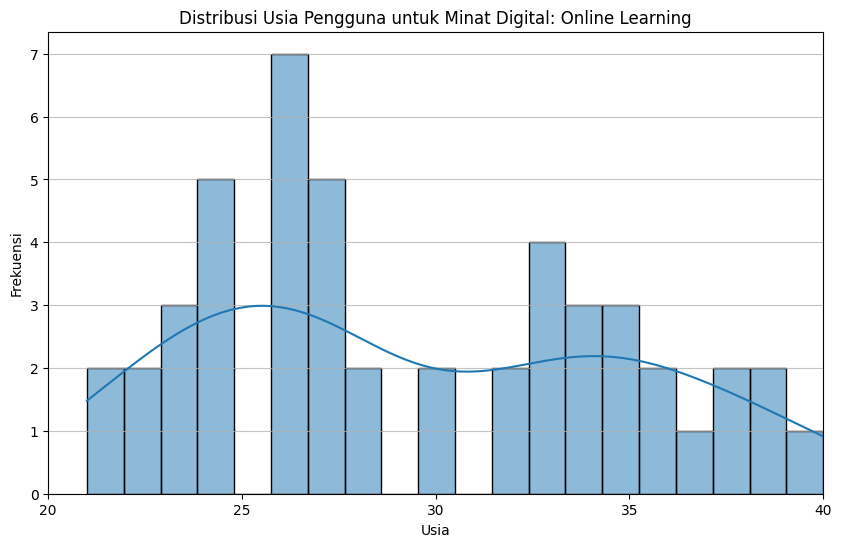


Analisis untuk Minat Digital: E-commerce
Rata-rata Usia: 29.14
Interval Kepercayaan 95% untuk Rata-rata Usia: (np.float64(27.18335050892098), np.float64(31.102363776793304))


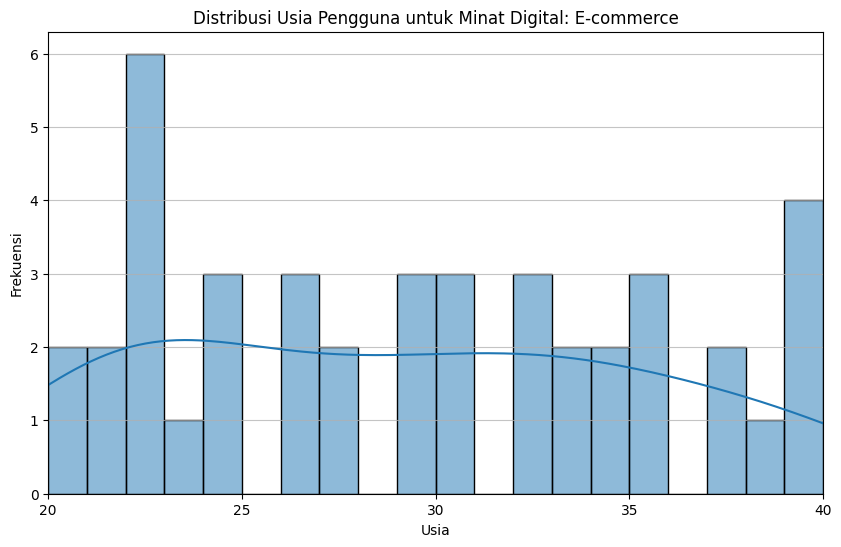

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

unique_minat_digital = df['Minat Digital'].unique()

for minat in unique_minat_digital:
    print(f"\nAnalisis untuk Minat Digital: {minat}")

    df_filtered_minat = df[df['Minat Digital'] == minat].copy()
    usia_filtered_cleaned = df_filtered_minat['Usia'].dropna()

    if len(usia_filtered_cleaned) > 1:
        mean_usia_minat = usia_filtered_cleaned.mean()

        #kalkulasi interval
        confidence_interval_minat = stats.t.interval(
            confidence=0.95,
            df=len(usia_filtered_cleaned)-1,
            loc=mean_usia_minat,
            scale=stats.sem(usia_filtered_cleaned)
        )

        print(f"Rata-rata Usia: {mean_usia_minat:.2f}")
        print(f"Interval Kepercayaan 95% untuk Rata-rata Usia: {confidence_interval_minat}")

        # Buat histogram usia untuk minat digital ini
        plt.figure(figsize=(10, 6))
        sns.histplot(usia_filtered_cleaned, bins=20, kde=True)
        plt.title(f"Distribusi Usia Pengguna untuk Minat Digital: {minat}")
        plt.xlabel("Usia")
        plt.ylabel("Frekuensi")
        plt.grid(axis='y', alpha=0.75)

        plt.xlim(20, 40)
        plt.xticks(np.arange(20, 41, 5))

        plt.show()

    elif len(usia_filtered_cleaned) == 1:
        print(f"Rata-rata Usia: {usia_filtered_cleaned.iloc[0]:.2f}")

        # Buat histogram usia untuk minat digital ini
        plt.figure(figsize=(10, 6))
        sns.histplot(usia_filtered_cleaned, bins=20, kde=True)
        plt.title(f"Distribusi Usia Pengguna untuk Minat Digital: {minat}")
        plt.xlabel("Usia")
        plt.ylabel("Frekuensi")
        plt.grid(axis='y', alpha=0.75)

        plt.xlim(20, 40)
        plt.xticks(np.arange(20, 41, 5))

        plt.show()

    else:
        print("Tidak ada data usia yang tersedia untuk minat digital ini.")

JUMLAH PENGGUNA BERDASARKAN MERK HP

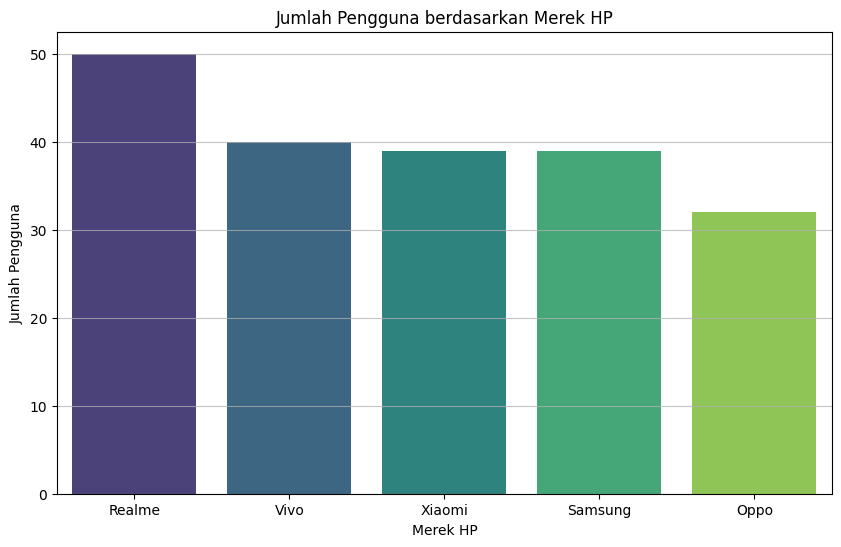

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Hitung jumlah pengguna per merek HP
jumlah_pengguna_per_merk_hp = df['Merk HP'].value_counts().reset_index()
jumlah_pengguna_per_merk_hp.columns = ['Merk HP', 'Jumlah Pengguna']

plt.figure(figsize=(10, 6))
sns.barplot(x='Merk HP', y='Jumlah Pengguna', data=jumlah_pengguna_per_merk_hp, hue='Merk HP', palette='viridis', legend=False)
plt.title("Jumlah Pengguna berdasarkan Merek HP")
plt.xlabel("Merek HP")
plt.ylabel("Jumlah Pengguna")
plt.grid(axis='y', alpha=0.75)
plt.show()

Jumlah pengguna berdasarkan minat digital

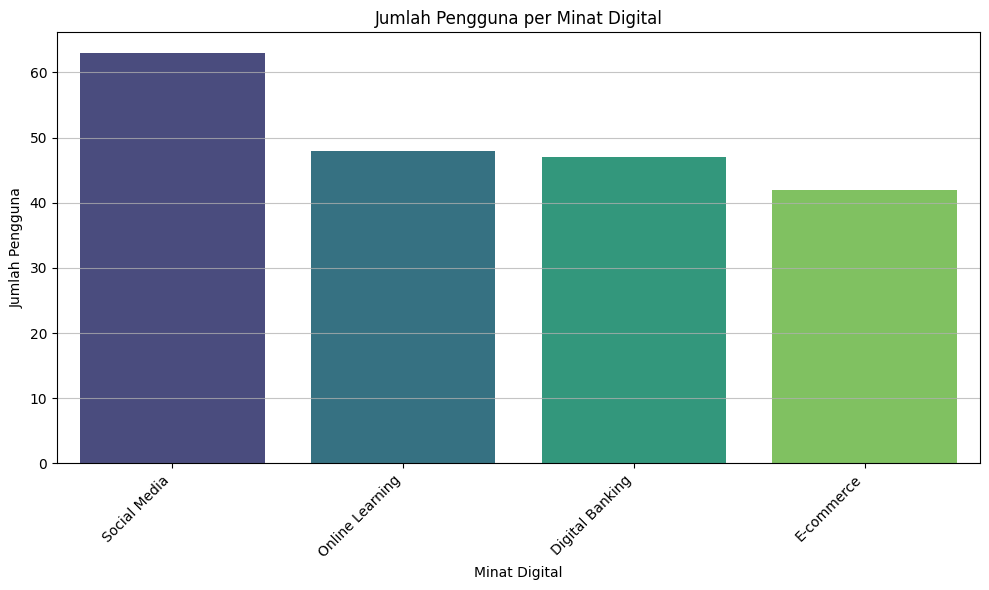

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Hitung jumlah pengguna per minat digital
jumlah_pengguna_per_minat = df['Minat Digital'].value_counts().reset_index()
jumlah_pengguna_per_minat.columns = ['Minat Digital', 'Jumlah Pengguna']

# Buat grafik batang jumlah pengguna per minat digital
plt.figure(figsize=(10, 6))
sns.barplot(x='Minat Digital', y='Jumlah Pengguna', data=jumlah_pengguna_per_minat, hue='Minat Digital', palette='viridis', legend=False)
plt.title("Jumlah Pengguna per Minat Digital")
plt.xlabel("Minat Digital")
plt.ylabel("Jumlah Pengguna")
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

jumlah pengguna berdasarkan kelompok usia

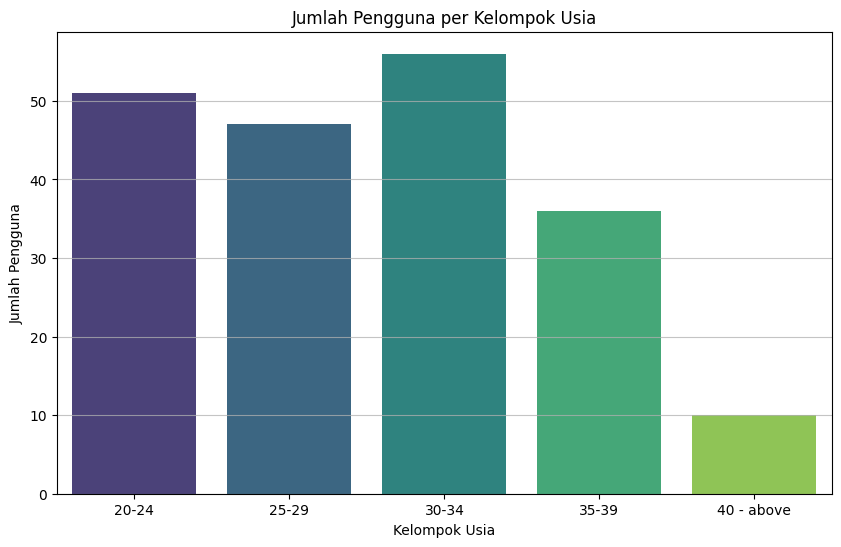

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

if 'Kelompok Usia' in df.columns:
    jumlah_pengguna_per_kelompok = df['Kelompok Usia'].value_counts().reset_index()
    jumlah_pengguna_per_kelompok.columns = ['Kelompok Usia', 'Jumlah Pengguna']
    age_group_order = ['20-24', '25-29', '30-34', '35-39', '40 - above']
    jumlah_pengguna_per_kelompok['Kelompok Usia'] = pd.Categorical(jumlah_pengguna_per_kelompok['Kelompok Usia'], categories=age_group_order, ordered=True)

    jumlah_pengguna_per_kelompok = jumlah_pengguna_per_kelompok.sort_values('Kelompok Usia')

    # Buat grafik batang jumlah pengguna per kelompok usia
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Kelompok Usia', y='Jumlah Pengguna', data=jumlah_pengguna_per_kelompok, hue='Kelompok Usia', palette='viridis', legend=False)
    plt.title("Jumlah Pengguna per Kelompok Usia")
    plt.xlabel("Kelompok Usia")
    plt.ylabel("Jumlah Pengguna")
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print("Kolom 'Kelompok Usia' tidak ditemukan. Harap jalankan kode pengelompokan usia terlebih dahulu.")

jumlah pengguna berdasarkan tipe lokasi

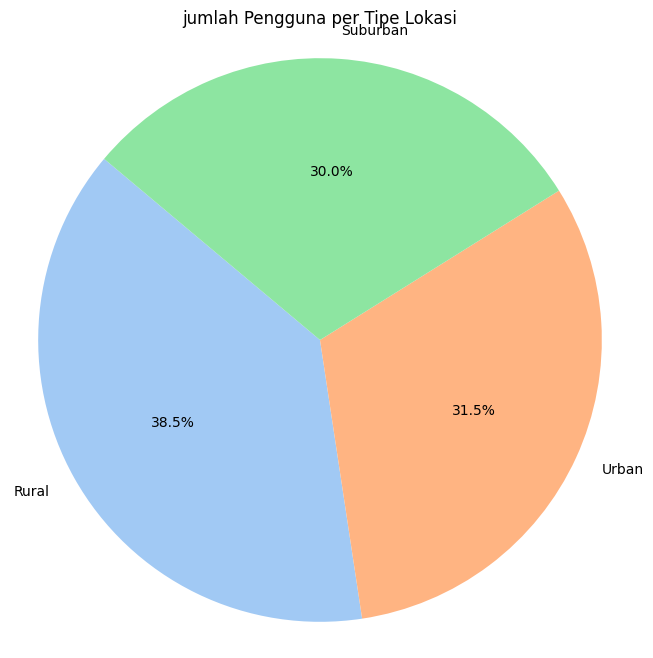

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Hitung jumlah pengguna per tipe lokasi
jumlah_pengguna_per_tipe_lokasi = df['Tipe Lokasi'].value_counts()

#pie chart
plt.figure(figsize=(8, 8))
plt.pie(jumlah_pengguna_per_tipe_lokasi, labels=jumlah_pengguna_per_tipe_lokasi.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("jumlah Pengguna per Tipe Lokasi")
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Box plot distribusi usia pengguna per tipe lokasi

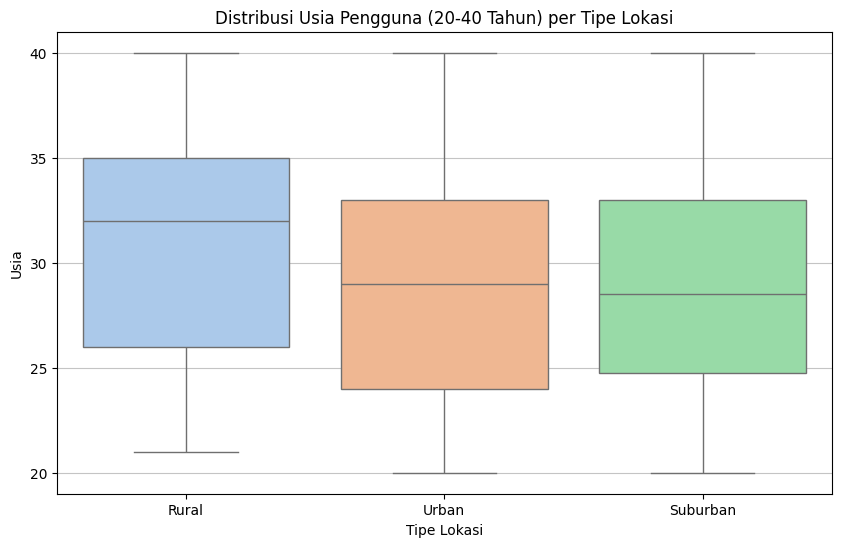

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

if 'Usia' in df.columns and 'Tipe Lokasi' in df.columns:
    df_filtered_age = df[(df['Usia'] >= 20) & (df['Usia'] <= 40)].copy()

    if not df_filtered_age.empty:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Tipe Lokasi', y='Usia', data=df_filtered_age, hue='Tipe Lokasi', palette='pastel', legend=False)
        plt.title("Distribusi Usia Pengguna (20-40 Tahun) per Tipe Lokasi")
        plt.xlabel("Tipe Lokasi")
        plt.ylabel("Usia")
        plt.grid(axis='y', alpha=0.75)
        plt.yticks(np.arange(20, 41, 5)) # Set ticks from 20 to 40 at intervals of 5


        plt.show()
    else:
        print("Tidak ada data pengguna berusia antara 20 hingga 40 tahun dalam DataFrame.")
else:
    print("Kolom 'Usia' atau 'Tipe Lokasi' tidak ditemukan.")